<h1>Decision Tree - Version 0.0.7<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Classification----Diabetes-Dataset----binary-class" data-toc-modified-id="Classification----Diabetes-Dataset----binary-class-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classification  - Diabetes Dataset -  binary class</a></span><ul class="toc-item"><li><span><a href="#Train-with-max_depth-=15,-Accuracy,-Logloss" data-toc-modified-id="Train-with-max_depth-=15,-Accuracy,-Logloss-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Train with max_depth =15, Accuracy, Logloss</a></span></li><li><span><a href="#Plot-Trained-Tree" data-toc-modified-id="Plot-Trained-Tree-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot Trained Tree</a></span></li><li><span><a href="#Analysing-the-Learning-Curve-and-Tree" data-toc-modified-id="Analysing-the-Learning-Curve-and-Tree-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Analysing the Learning Curve and Tree</a></span></li><li><span><a href="#Shrinking-the-trained-tree-to-depth=5" data-toc-modified-id="Shrinking-the-trained-tree-to-depth=5-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Shrinking the trained tree to depth=5</a></span></li></ul></li><li><span><a href="#Regression---Diabetes-Dataset---score" data-toc-modified-id="Regression---Diabetes-Dataset---score-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regression - Diabetes Dataset - score</a></span><ul class="toc-item"><li><span><a href="#Train-with-max_depth=15,-MSE,-MAE" data-toc-modified-id="Train-with-max_depth=15,-MSE,-MAE-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Train with max_depth=15, MSE, MAE</a></span></li><li><span><a href="#Plot-trained-Tree" data-toc-modified-id="Plot-trained-Tree-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plot trained Tree</a></span></li><li><span><a href="#Analysing-the-Learning-Curve-and-Tree-with-MAE" data-toc-modified-id="Analysing-the-Learning-Curve-and-Tree-with-MAE-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Analysing the Learning Curve and Tree with MAE</a></span></li><li><span><a href="#Shrining-a-trained-Tree-to-depth=2" data-toc-modified-id="Shrining-a-trained-Tree-to-depth=2-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Shrining a trained Tree to depth=2</a></span></li></ul></li></ul></div>

<span style="color:blue;background:white;float:right">**Nikesh Bajaj**</span>
$$.$$
<span style="color:green;float:right">
https://github.com/Nikeshbajaj/spkit
</span> <br>
<span style="color:green;float:right">
http://nikeshbajaj.in
</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import copy

In [2]:
import spkit
spkit.__version__

'0.0.7'

# Classification  - Diabetes Dataset -  binary class

In [3]:
from spkit.ml import ClassificationTree

In [4]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X = data.data
y = 1*(data.target>np.mean(data.target))

feature_names = data.feature_names
print(X.shape, y.shape)
Xt,Xs,yt,ys = train_test_split(X,y,test_size =0.3)
print(Xt.shape, Xs.shape,yt.shape, ys.shape)

(442, 10) (442,)
(309, 10) (133, 10) (309,) (133,)


## Train with max_depth =15, Accuracy, Logloss

In [5]:
clf = ClassificationTree(max_depth=15)
clf.fit(Xt,yt,feature_names=feature_names)
ytp = clf.predict(Xt)
ysp = clf.predict(Xs)

ytpr = clf.predict_proba(Xt)[:,1]
yspr = clf.predict_proba(Xs)[:,1]

print('Depth of trained Tree ', clf.getTreeDepth())
print('Accuracy')
print('- Training : ',np.mean(ytp==yt))
print('- Testing  : ',np.mean(ysp==ys))
print('Logloss')
Trloss = -np.mean(yt*np.log(ytpr+1e-10)+(1-yt)*np.log(1-ytpr+1e-10))
Tsloss = -np.mean(ys*np.log(yspr+1e-10)+(1-ys)*np.log(1-yspr+1e-10))
print('- Training : ',Trloss)
print('- Testing  : ',Tsloss)

Depth of trained Tree  11
Accuracy
- Training :  1.0
- Testing  :  0.631578947368421
Logloss
- Training :  -1.0000000826903709e-10
- Testing  :  8.483208237283327


## Plot Trained Tree

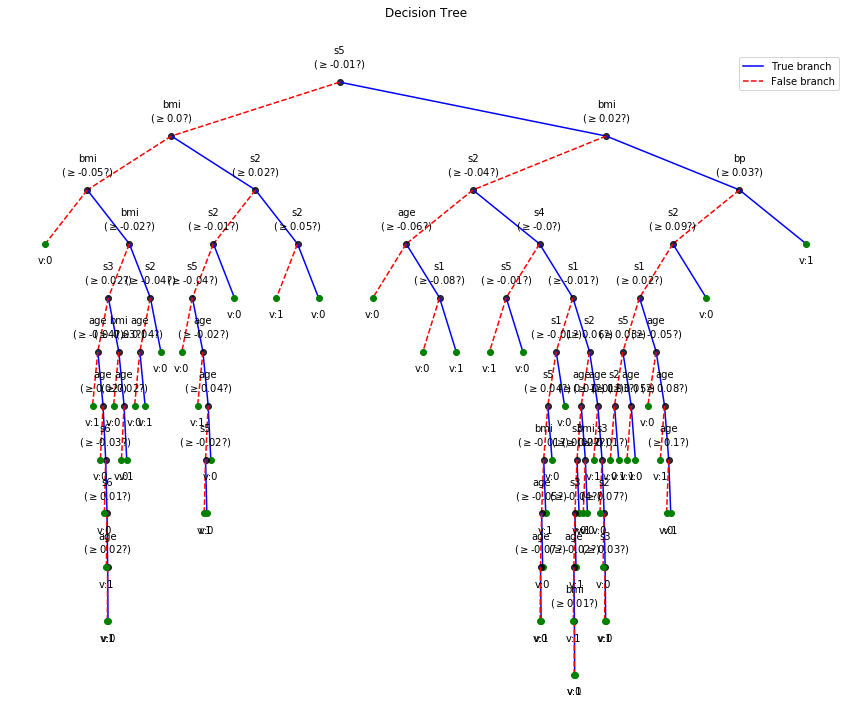

In [6]:
plt.figure(figsize=(15,12))
clf.plotTree()

## Analysing the Learning Curve and Tree

In [7]:
Lcurve = clf.getLcurve(Xt=Xt,yt=yt,Xs=Xs,ys=ys,measure='acc')
Lcurve

{'measure': 'acc',
 1: {'train': 0.7346278317152104, 'test': 0.6992481203007519},
 2: {'train': 0.7378640776699029, 'test': 0.6842105263157895},
 3: {'train': 0.7799352750809061, 'test': 0.6917293233082706},
 4: {'train': 0.8025889967637541, 'test': 0.6992481203007519},
 5: {'train': 0.8511326860841424, 'test': 0.7142857142857143},
 6: {'train': 0.9029126213592233, 'test': 0.6541353383458647},
 7: {'train': 0.9255663430420712, 'test': 0.6541353383458647},
 8: {'train': 0.9644012944983819, 'test': 0.6541353383458647},
 9: {'train': 0.9838187702265372, 'test': 0.6165413533834586},
 10: {'train': 0.9967637540453075, 'test': 0.631578947368421},
 11: {'train': 1.0, 'test': 0.631578947368421}}

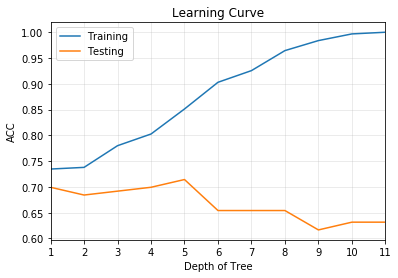

In [8]:
clf.plotLcurve()
plt.xlim([1,clf.getTreeDepth()])
plt.xticks(np.arange(1,clf.getTreeDepth()+1))
plt.show()

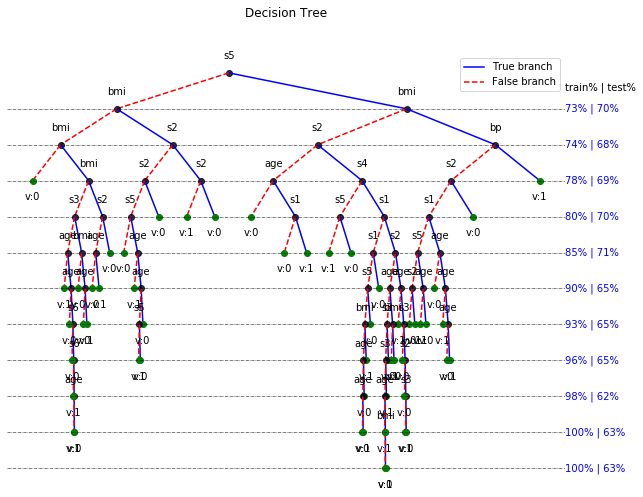

In [9]:
plt.figure(figsize=(10,8))
clf.plotTree(show=False,Measures=True,showNodevalues=True,showThreshold=False)

## Shrinking the trained tree to depth=5

In [10]:
clf.updateTree(shrink=True,max_depth=5)

In [11]:
ytp = clf.predict(Xt)
ysp = clf.predict(Xs)

ytpr = clf.predict_proba(Xt)[:,1]
yspr = clf.predict_proba(Xs)[:,1]

print('Depth of trained Tree ', clf.getTreeDepth())
print('Accuracy')
print('- Training : ',np.mean(ytp==yt))
print('- Testing  : ',np.mean(ysp==ys))
print('Logloss')
Trloss = -np.mean(yt*np.log(ytpr+1e-10)+(1-yt)*np.log(1-ytpr+1e-10))
Tsloss = -np.mean(ys*np.log(yspr+1e-10)+(1-ys)*np.log(1-yspr+1e-10))
print('- Training : ',Trloss)
print('- Testing  : ',Tsloss)

Depth of trained Tree  5
Accuracy
- Training :  0.8511326860841424
- Testing  :  0.7142857142857143
Logloss
- Training :  0.28243521019082424
- Testing  :  3.4249410361128114


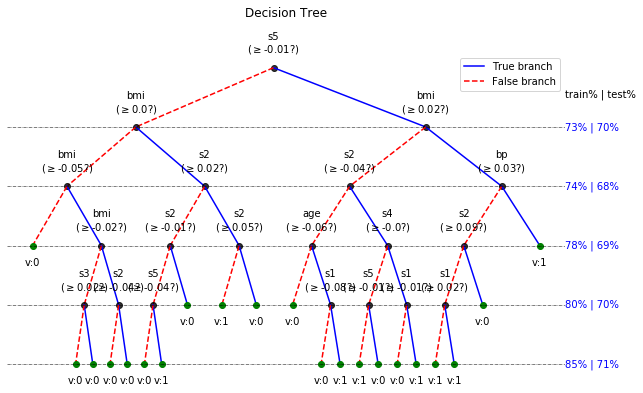

In [12]:
plt.figure(figsize=(10,6))
clf.plotTree(show=False,Measures=True,showNodevalues=True,showThreshold=True)

# Regression - Diabetes Dataset - score

In [13]:
from spkit.ml import RegressionTree

In [14]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X = data.data
y = data.target

feature_names = data.feature_names
print(X.shape, y.shape)
Xt,Xs,yt,ys = train_test_split(X,y,test_size =0.3)
print(Xt.shape, Xs.shape,yt.shape, ys.shape)

(442, 10) (442,)
(309, 10) (133, 10) (309,) (133,)


## Train with max_depth=15, MSE, MAE

In [15]:
rgs = RegressionTree(max_depth=15)
rgs.fit(Xt,yt,feature_names=feature_names)
ytp = rgs.predict(Xt)
ysp = rgs.predict(Xs)
print('Depth of trained Tree ', rgs.getTreeDepth())
print('MSE')
print('- Training : ',np.mean((ytp-yt)**2))
print('- Testing  : ',np.mean((ysp-ys)**2))
print('MAE')
print('- Training : ',np.mean(np.abs(ytp-yt)))
print('- Testing  : ',np.mean(np.abs(ysp-ys)))

Depth of trained Tree  15
MSE
- Training :  0.5331715210355987
- Testing  :  6719.0098684210525
MAE
- Training :  0.11974110032362459
- Testing  :  63.8515037593985


## Plot trained Tree

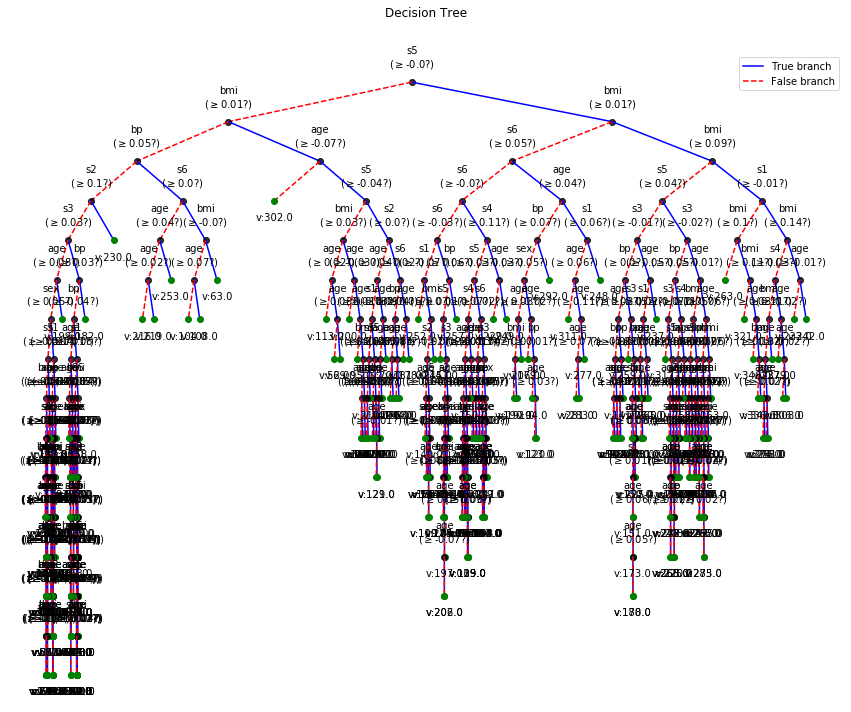

In [17]:
plt.figure(figsize=(15,12))
rgs.plotTree()

## Analysing the Learning Curve and Tree with MAE

In [18]:
Lcurve = rgs.getLcurve(Xt=Xt,yt=yt,Xs=Xs,ys=ys,measure='mae')
Lcurve

{'measure': 'mae',
 1: {'train': 51.20441717471986, 'test': 58.40004989850192},
 2: {'train': 43.484967830972124, 'test': 53.856804608277706},
 3: {'train': 40.95293267401816, 'test': 56.18160290129361},
 4: {'train': 35.76295261059741, 'test': 55.00276259811718},
 5: {'train': 30.412338045514108, 'test': 59.31759876633998},
 6: {'train': 25.519517698215022, 'test': 59.11865860337886},
 7: {'train': 20.180316241622222, 'test': 58.24389848031614},
 8: {'train': 14.867652117253725, 'test': 60.870194727060166},
 9: {'train': 9.894303138061385, 'test': 62.00356247762263},
 10: {'train': 6.556256041692935, 'test': 63.032883344725455},
 11: {'train': 4.484426037824096, 'test': 63.20437019121229},
 12: {'train': 2.599321929419017, 'test': 64.11349803079126},
 13: {'train': 1.3364462937278472, 'test': 63.42710347296813},
 14: {'train': 0.592017259978425, 'test': 63.9704260651629},
 15: {'train': 0.11974110032362459, 'test': 63.8515037593985}}

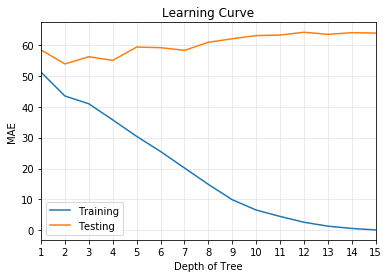

In [19]:
rgs.plotLcurve()
plt.xlim([1,rgs.getTreeDepth()])
plt.xticks(np.arange(1,rgs.getTreeDepth()+1))
plt.show()

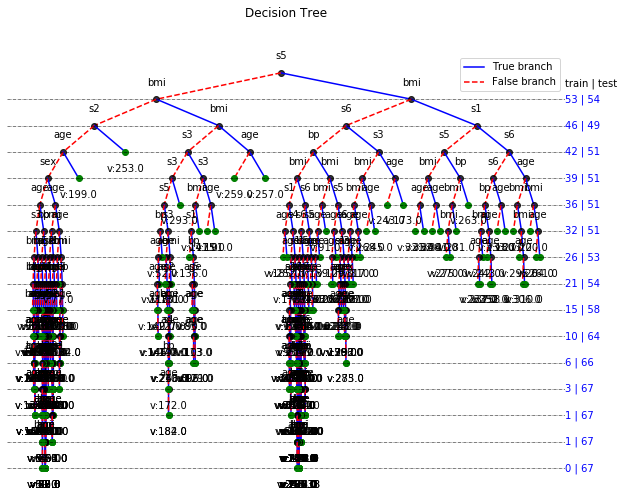

In [20]:
plt.figure(figsize=(10,8))
rgs.plotTree(show=False,Measures=True,showNodevalues=True,showThreshold=False)

## Shrining a trained Tree to depth=2

In [20]:
rgs.updateTree(shrink=True,max_depth=2)

In [21]:
ytp = rgs.predict(Xt)
ysp = rgs.predict(Xs)
print('Depth of trained Tree ', rgs.getTreeDepth())
print('MSE')
print('- Training : ',np.mean((ytp-yt)**2))
print('- Testing  : ',np.mean((ysp-ys)**2))
print('MAE')
print('- Training : ',np.mean(np.abs(ytp-yt)))
print('- Testing  : ',np.mean(np.abs(ysp-ys)))

Depth of trained Tree  2
MSE
- Training :  2986.7724027040595
- Testing  :  4406.203228913139
MAE
- Training :  43.484967830972124
- Testing  :  53.856804608277706


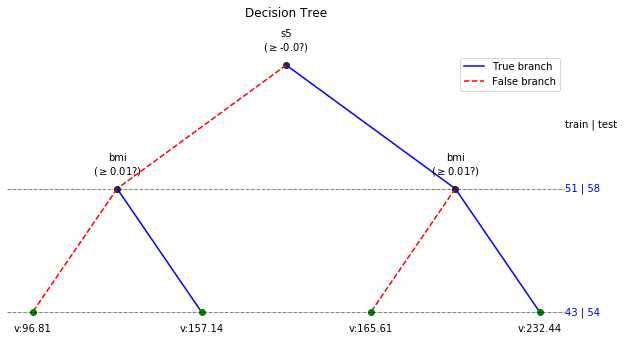

In [22]:
plt.figure(figsize=(10,5))
rgs.plotTree(show=False,Measures=True,showNodevalues=True,showThreshold=True)